In [1]:
import pandas as pd
import numpy as np

In [19]:
N_spins = 20
df = pd.read_csv(f"../Results_Metropolis/Erro/erro_sampleN{N_spins}.dat",sep=' ')
df

,inter,erroJ,erroh
0,1,0.001454,0.001187
1,2,0.005334,0.003787
2,3,0.024454,0.016076
3,4,0.088314,0.051406
4,5,0.506556,0.377490
...,...,...,...
4376,4378,0.001374,0.000983
4377,4379,0.002597,0.002281
4378,4380,0.002206,0.001879
4379,4381,0.002021,0.001686


In [31]:
max(df['inter'].values)
#df["erroJ"].values

np.int64(1788571114251)

1788571114251


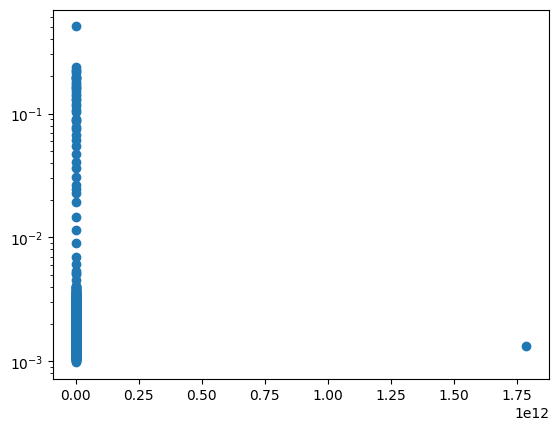

In [30]:
import matplotlib.pyplot as plt

plt.plot(df["inter"].values,df["erroJ"].values,'o')
plt.yscale("log")
print(max(df['inter']))
plt.show()